# Covid-19-Random-Forest

**Importing Relevant Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore")

**Loading Dataset**

In [3]:
df = pd.read_csv('covid_19_india.csv', parse_dates=['Date'],dayfirst=True)

In [4]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


**Extracting required columns from dataframe**

In [5]:
df = df[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]

In [6]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [7]:
df.columns = ['Date','State','Cured','Deaths','Confirmed']

**Reviewing Dataset**

In [8]:
df.head()

,Date,State,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [9]:
df.tail()

,Date,State,Cured,Deaths,Confirmed
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       18110 non-null  datetime64[ns]
 1   State      18110 non-null  object        
 2   Cured      18110 non-null  int64         
 3   Deaths     18110 non-null  int64         
 4   Confirmed  18110 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 707.5+ KB


In [11]:
df.shape

(18110, 5)

In [12]:
df.describe()

,Cured,Deaths,Confirmed
count,1.811000e+04,18110.000000,1.811000e+04
mean,2.786375e+05,4052.402264,3.010314e+05
std,6.148909e+05,10919.076411,6.561489e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,3.360250e+03,32.000000,4.376750e+03
50%,3.336400e+04,588.000000,3.977350e+04
75%,2.788698e+05,3643.750000,3.001498e+05
max,6.159676e+06,134201.000000,6.363442e+06


**Let's Check The Null Values**

In [13]:
df.isnull().sum()

Date         0
State        0
Cured        0
Deaths       0
Confirmed    0
dtype: int64

We Don't have any Null Values in our Dataset.

**Extracting 2020-07-17 date Data from dataframe**

In [14]:
today = df[df.Date == '2020-07-17']

In [15]:
today.head()

,Date,State,Cured,Deaths,Confirmed
4179,2020-07-17,Andaman and Nicobar Islands,133,0,180
4180,2020-07-17,Andhra Pradesh,19393,492,38044
4181,2020-07-17,Arunachal Pradesh,153,3,543
4182,2020-07-17,Assam,12888,48,19754
4183,2020-07-17,Bihar,14018,197,21764


**Extracting maximum number of confirmed cases from today dataframe.**

In [16]:
max_confirmed_cases = today.sort_values(by=['Confirmed'],ascending=False)

In [17]:
max_confirmed_cases.head()

,Date,State,Cured,Deaths,Confirmed
4198,2020-07-17,Maharashtra,158140,11194,284281
4208,2020-07-17,Tamil Nadu,107416,2236,156369
4187,2020-07-17,Delhi,97693,3545,118645
4194,2020-07-17,Karnataka,19729,1032,51422
4189,2020-07-17,Gujarat,32103,2089,45481


**Extracting top 5 rows from max_confirmed_cases dataframe.**

In [18]:
top_states_confirmed = max_confirmed_cases[0:5]

In [19]:
top_states_confirmed

,Date,State,Cured,Deaths,Confirmed
4198,2020-07-17,Maharashtra,158140,11194,284281
4208,2020-07-17,Tamil Nadu,107416,2236,156369
4187,2020-07-17,Delhi,97693,3545,118645
4194,2020-07-17,Karnataka,19729,1032,51422
4189,2020-07-17,Gujarat,32103,2089,45481


**Creating a barplot for df dataframe with state and Confirmed column**

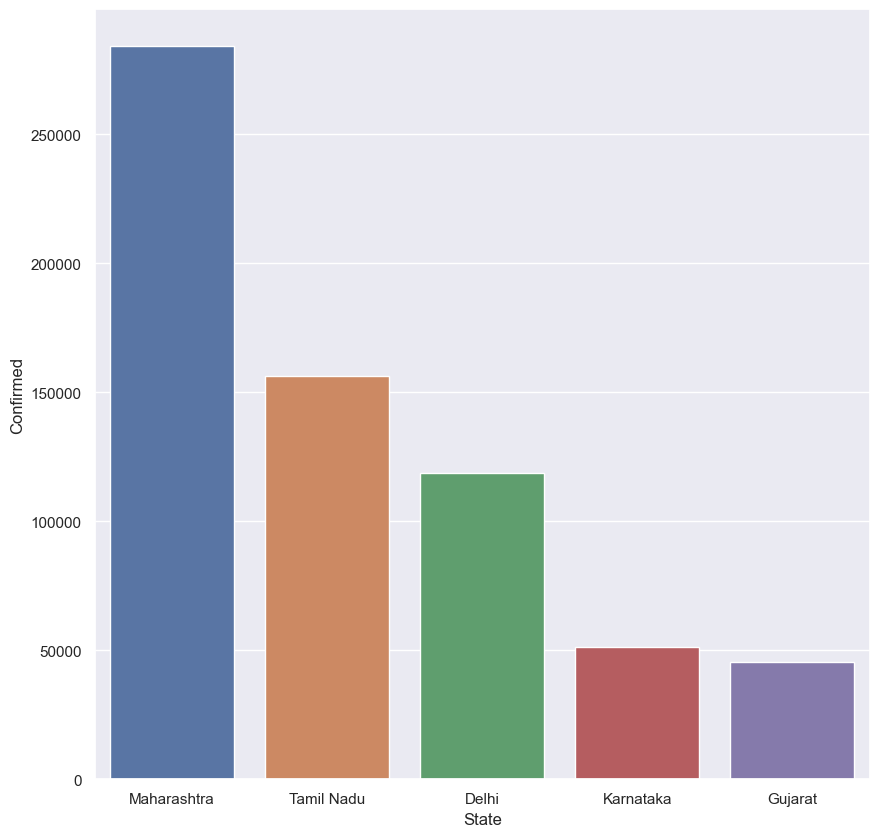

In [20]:
plt.figure(figsize=(10, 10))
sns.barplot(x = "State",y="Confirmed",data=top_states_confirmed)
plt.show()

Based on the bar plot above, we can conclude that Maharashtra has the highest number of confirmed covid cases.

**Extracting maximum number of Death cases from today dataframe.**

In [21]:
max_death_cases = today.sort_values(by=['Deaths'],ascending=False)

In [22]:
max_death_cases.head()

,Date,State,Cured,Deaths,Confirmed
4198,2020-07-17,Maharashtra,158140,11194,284281
4187,2020-07-17,Delhi,97693,3545,118645
4208,2020-07-17,Tamil Nadu,107416,2236,156369
4189,2020-07-17,Gujarat,32103,2089,45481
4212,2020-07-17,Uttar Pradesh,26675,1046,43441


**Extracting top 5 rows from max_death_cases dataframe.**

In [23]:
top_states_deaths = max_death_cases[0:5]

**Creating a barplot for df dataframe with state and Deaths column**

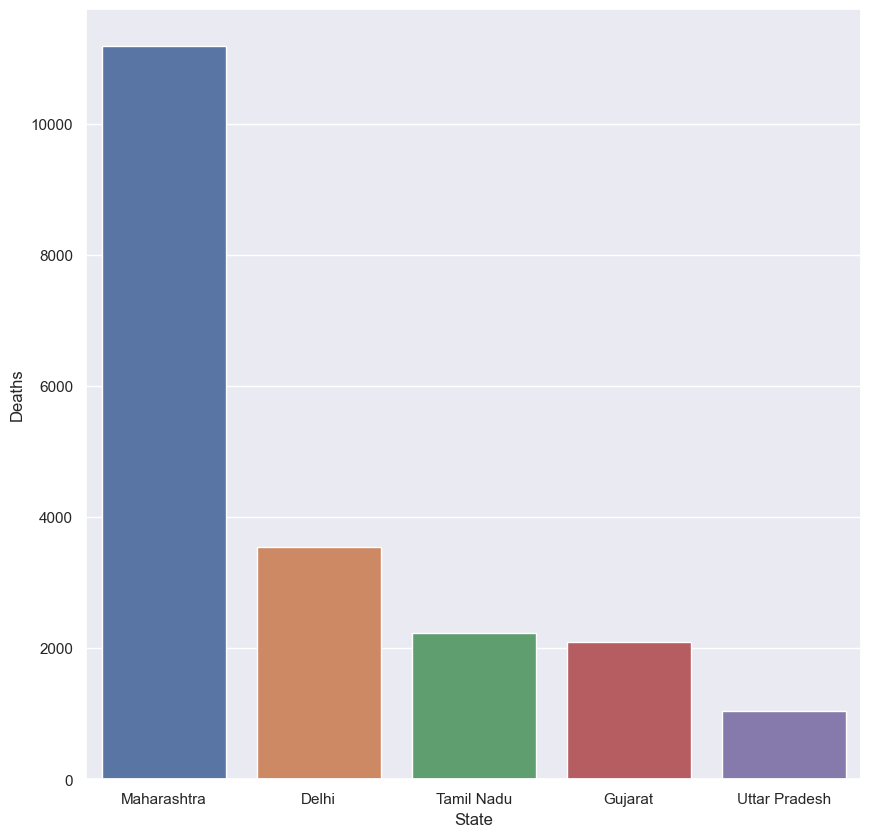

In [24]:
plt.figure(figsize=(10, 10))
sns.barplot(x = "State",y="Deaths",data=top_states_deaths)
plt.show()

Based on the bar plot above, we can conclude that Maharashtra has the highest number of deaths covid cases.

**Extracting maximum number of cured cases from today dataframe.**

In [25]:
max_cured_cases = today.sort_values(by=['Cured'],ascending=False)

In [26]:
max_cured_cases.head()

,Date,State,Cured,Deaths,Confirmed
4198,2020-07-17,Maharashtra,158140,11194,284281
4208,2020-07-17,Tamil Nadu,107416,2236,156369
4187,2020-07-17,Delhi,97693,3545,118645
4189,2020-07-17,Gujarat,32103,2089,45481
4209,2020-07-17,Telengana,27295,396,41018


**Extracting top 5 rows from max_cured_cases dataframe.**

In [27]:
top_states_cured = max_cured_cases[0:5]

**Creating a barplot for df dataframe with state and cured column**

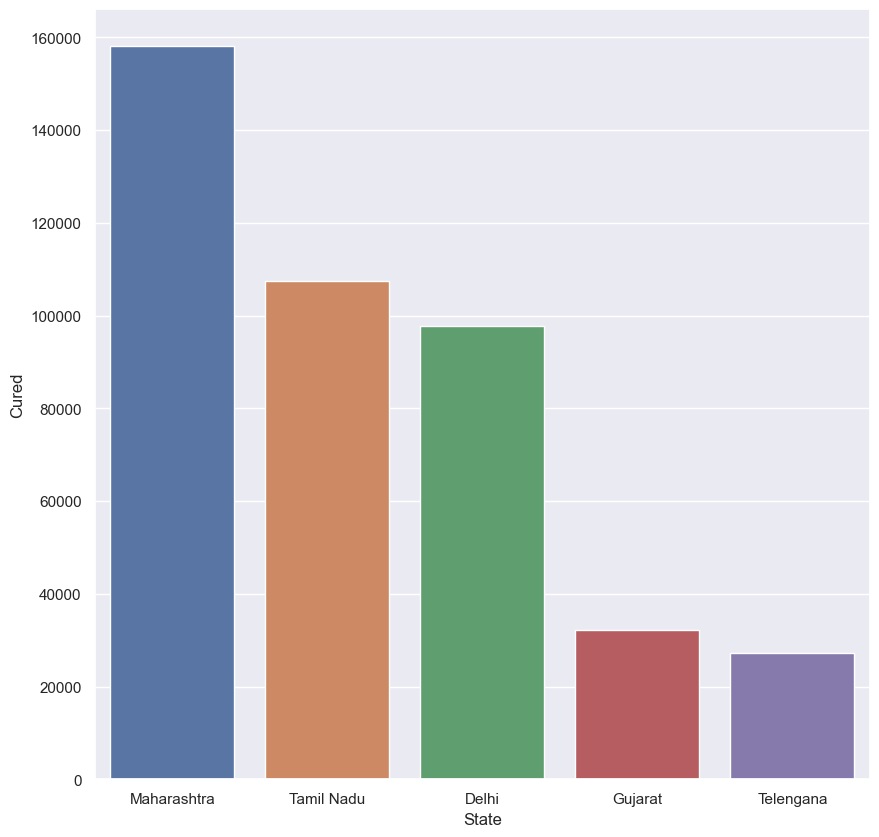

In [28]:
plt.figure(figsize=(10, 10))
sns.barplot(x = "State",y="Cured",data=top_states_cured)
plt.show()

Based on the bar plot above, we can conclude that Maharashtra has the highest number of cured covid cases.

**Extracting Maharashtra State cases from  dataframe(df).**

In [29]:
maha = df[df.State == 'Maharashtra']

In [30]:
maha.head()

,Date,State,Cured,Deaths,Confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14


In [31]:
maha.tail()

,Date,State,Cured,Deaths,Confirmed
17950,2021-08-07,Maharashtra,6130137,133717,6341759
17986,2021-08-08,Maharashtra,6139493,133845,6347820
18022,2021-08-09,Maharashtra,6144388,133996,6353328
18058,2021-08-10,Maharashtra,6151956,134064,6357833
18094,2021-08-11,Maharashtra,6159676,134201,6363442


**Creating a lineplot for maha dataframe with date and confirmed column**

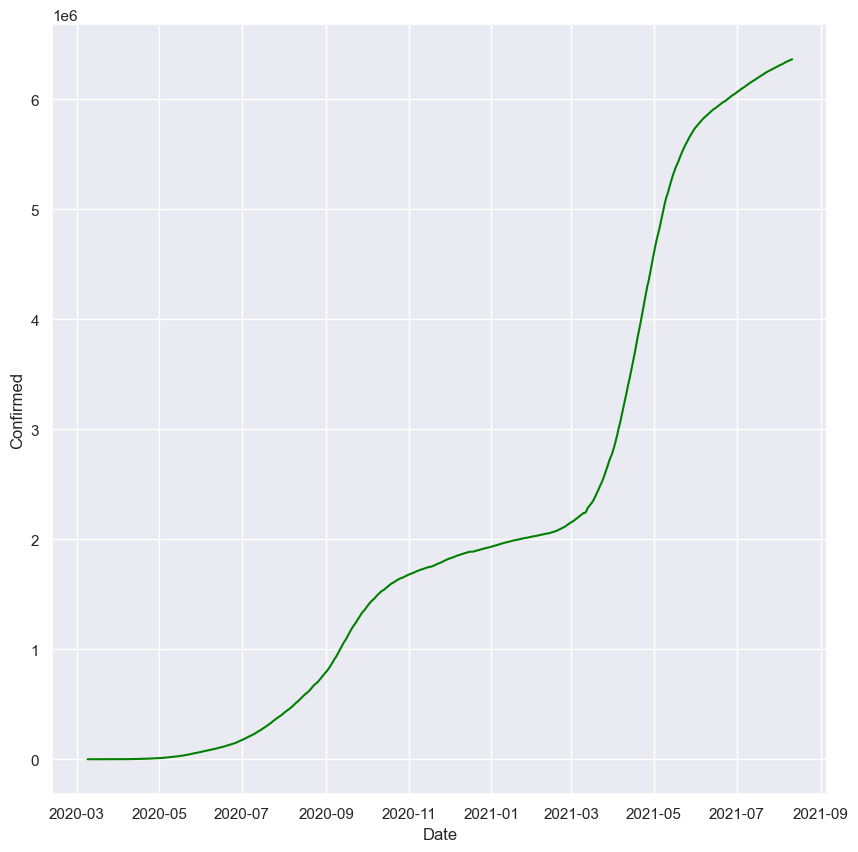

In [32]:
plt.figure(figsize=(10, 10))
sns.lineplot(x = "Date",y="Confirmed",data=maha,color="green")
plt.show()

**Creating a lineplot for maha dataframe with date and deaths column**

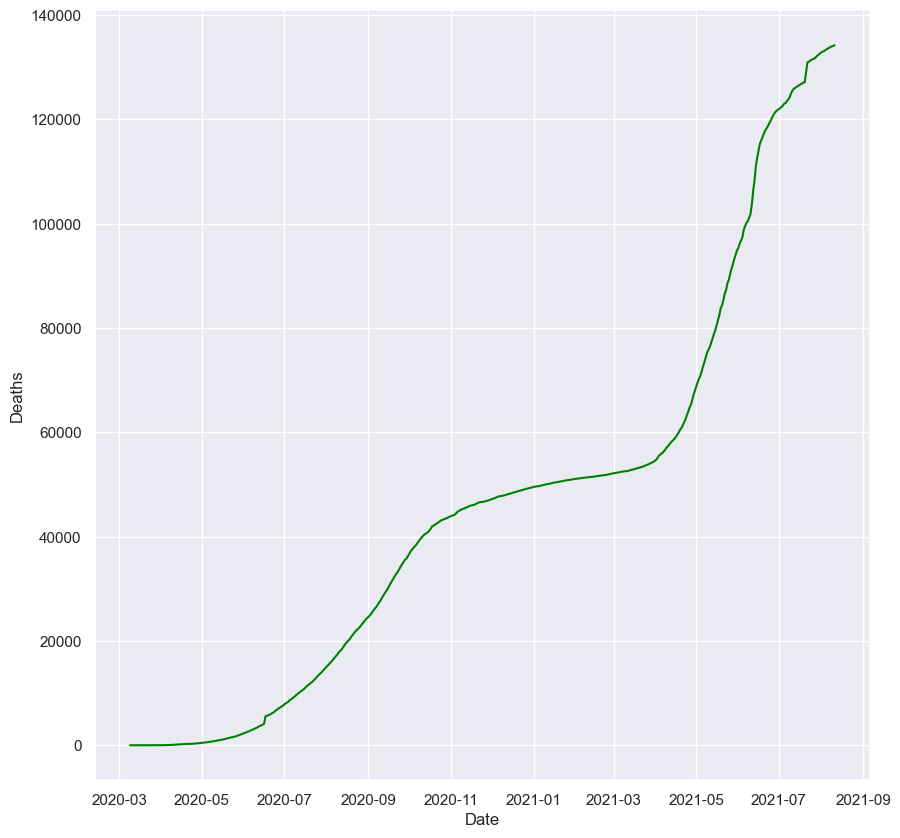

In [33]:
plt.figure(figsize=(10, 10))
sns.lineplot(x = "Date",y="Deaths",data=maha,color="green")
plt.show()

**Extracting kerala State cases from  dataframe(df).**

In [34]:
kerala = df[df.State == 'Kerala']

In [35]:
kerala.head()

,Date,State,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [36]:
kerala.tail()

,Date,State,Cured,Deaths,Confirmed
17946,2021-08-07,Kerala,3317314,17515,3513551
17982,2021-08-08,Kerala,3337579,17654,3533918
18018,2021-08-09,Kerala,3357687,17747,3552525
18054,2021-08-10,Kerala,3377691,17852,3565574
18090,2021-08-11,Kerala,3396184,18004,3586693


**Creating a lineplot for kerala dataframe with date and confirmed column**

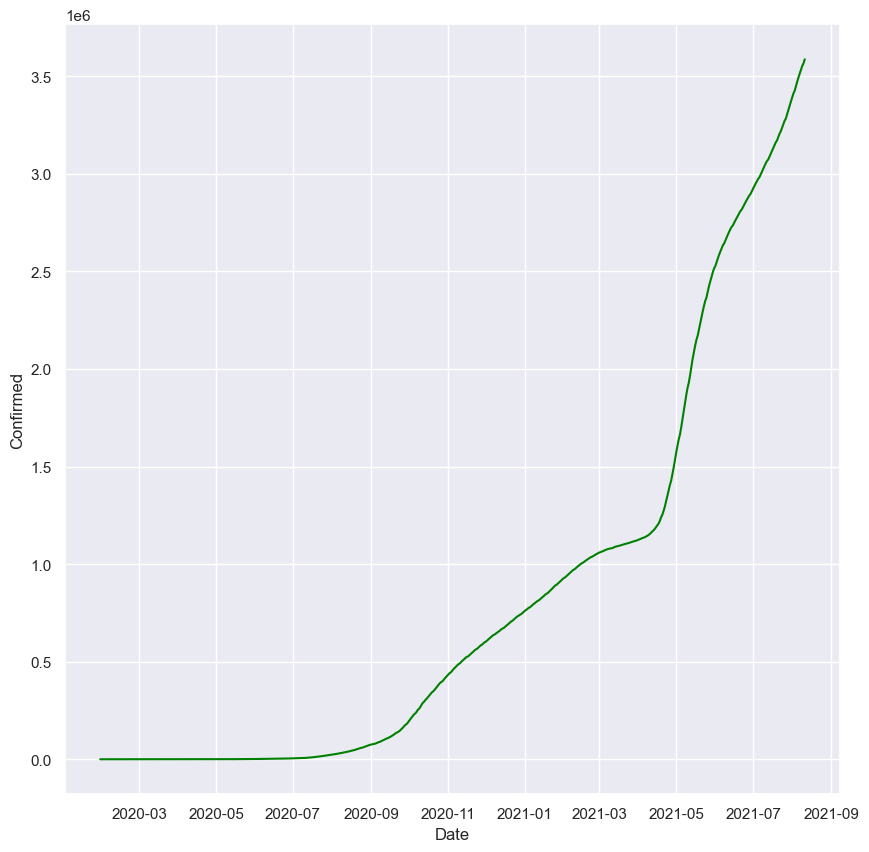

In [37]:
plt.figure(figsize=(10, 10))
sns.lineplot(x = "Date",y="Confirmed",data=kerala,color="green")
plt.show()

**Creating a lineplot for kerala dataframe with date and deaths column**

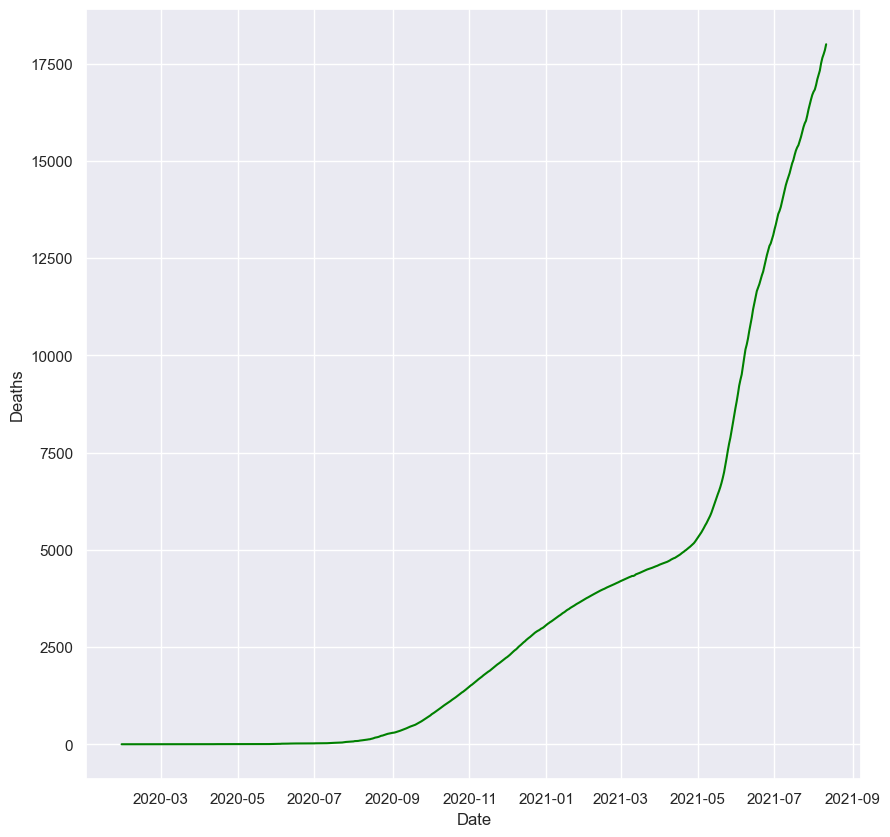

In [38]:
plt.figure(figsize=(10, 10))
sns.lineplot(x = "Date",y="Deaths",data=kerala,color="green")
plt.show()

**Bulding Model**

In [39]:
from sklearn.model_selection import train_test_split

**convert data column into ordinal value**

In [40]:
maha['Date'] = maha['Date'].map(dt.datetime.toordinal)

In [41]:
maha.head()

,Date,State,Cured,Deaths,Confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [42]:
x = maha['Date'] #independent variable
y = maha['Confirmed'] #dependent variable


In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

**importing RandomForestRegressor from sklearn library.**

In [44]:
from sklearn.ensemble import RandomForestRegressor

**Creating instance of RandomForestRegressor as rf.**

In [45]:
rf = RandomForestRegressor()

In [46]:
y_train #No of confirmed cases

15286    5602019
5145      548313
15178    5527092
15646    5791413
9346     1868172
          ...   
11002    2010948
10426    1965556
1624       14541
9634     1888767
13342    2812980
Name: Confirmed, Length: 364, dtype: int64

**Fitting RandomForestRegressor() Model**

In [47]:
rf.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))#Remove the indices

RandomForestRegressor()

In [48]:
maha.tail()

,Date,State,Cured,Deaths,Confirmed
17950,738009,Maharashtra,6130137,133717,6341759
17986,738010,Maharashtra,6139493,133845,6347820
18022,738011,Maharashtra,6144388,133996,6353328
18058,738012,Maharashtra,6151956,134064,6357833
18094,738013,Maharashtra,6159676,134201,6363442


**Predicting Dependant Values Confirmed.**

In [49]:
rf.predict(np.array([[738011]])) #Passing independent variable date and predict confirmed column value

array([6352928.27])

**Checking accuracy of our model.**

In [50]:
accuracy = rf.score(np.array(x_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1))
rounded_accuracy = round(accuracy, 5)

print("Our Model Is", rounded_accuracy*100 ,"% accurate.")

Our Model Is 99.995 % accurate.


**Conclusion**

The **RandomForestRegressor** model applied to the COVID-19 dataset exhibits strong predictive performance.